In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# https://data.world/health/opioid-overdose-deaths
#overdose_deaths = pd.read_csv('./datasets/bdc/Multiple Cause of Death, 1999-2014 v1.1.csv')

# https://public.opendatasoft.com/explore/dataset/opioid-overdose-deaths-by-type-of-opioid/table/
overdose = pd.read_csv('datasets/bdc/opioid-overdose-deaths-by-type-of-opioid.csv', sep=';')

# https://data.world/carlvlewis/u-s-metro-areas-violent-crime-rates-by-type-1970-2015
crime = pd.read_csv('./datasets/bdc/ucr_crime_1975_2015.csv')

# https://public.opendatasoft.com/explore/dataset/prescription-opioid-overdose-deaths-and-death-rate-per-100000-population-age-adj/export/
pre_od = pd.read_csv('datasets/bdc/prescription-opioid-overdose-deaths-and-death-rate-per-100000-population-age-adj.csv', sep=';')

In [4]:
us_state_abbrev = {
    'Colorado': 'CO',
    'Washington': 'WA',
}

In [5]:
overdose.columns

Index(['Location', 'Year', 'Heroin', 'Heroin (missing reason)', 'Methadone',
       'Methadone (missing reason)',
       'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)',
       'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone) (missing reason)',
       'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)',
       'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol) (missing reason)',
       'Footnotes'],
      dtype='object')

In [39]:
columns = ['Location', 'Year', 'Heroin',
           'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)',
           'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)'
          ]
overdose_col = overdose[columns][overdose['Location'] == 'Colorado']
print(overdose_col.shape)

overdose_wash = overdose[columns][overdose['Location'] == 'Washington']
print(overdose_wash.shape)

(17, 5)
(17, 5)


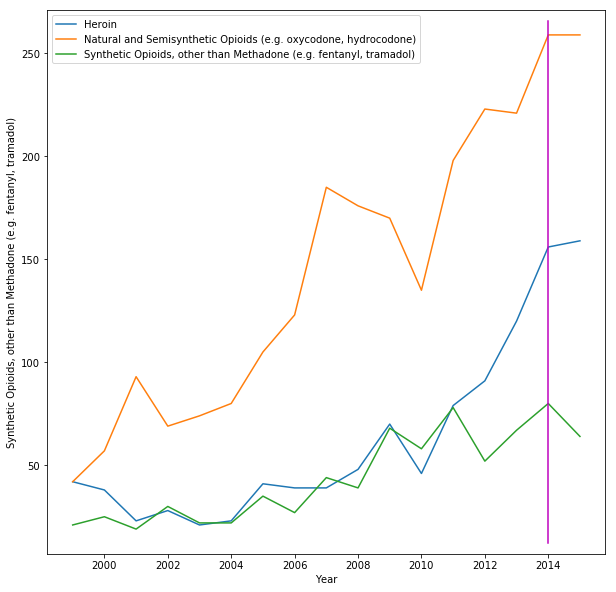

In [73]:
plt.figure(figsize=(10, 10))
for column in columns[2:]:
    ax = sns.lineplot(x='Year', y=column, data=overdose_col, label=column)
plt.axvline(2014, 0.02, 0.98, c='m', label='Legalization')
plt.show()

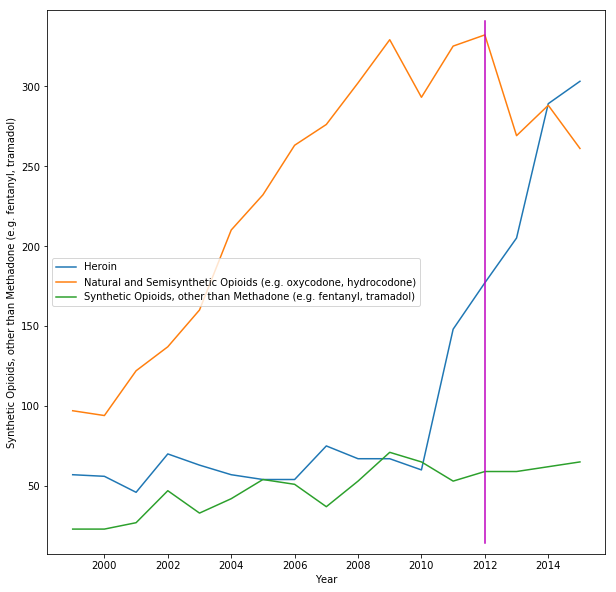

In [74]:
plt.figure(figsize=(10, 10))
for column in columns[2:]:
    ax = sns.lineplot(x='Year', y=column, data=overdose_wash, label=column)
plt.axvline(2012, 0.02, 0.98, c='m', label='Legalization')
plt.show()

In [50]:
crime['State'] = ''

for key, value in us_state_abbrev.items():
    crime['State'][crime['ORI'].str.startswith(value, na=False)] = key

crime.columns

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Index(['ORI', 'year', 'department_name', 'total_pop', 'homs_sum', 'rape_sum',
       'rob_sum', 'agg_ass_sum', 'violent_crime', 'months_reported',
       'violent_per_100k', 'homs_per_100k', 'rape_per_100k', 'rob_per_100k',
       'agg_ass_per_100k', 'source', 'url', 'State'],
      dtype='object')

In [51]:
crime_columns = ['year', 'total_pop', 'violent_per_100k', 'rob_per_100k', 'agg_ass_per_100k']

crime_col = crime[crime_columns][crime['State'] == 'Colorado']
crime_wash = crime[crime_columns][crime['State'] == 'Washington']

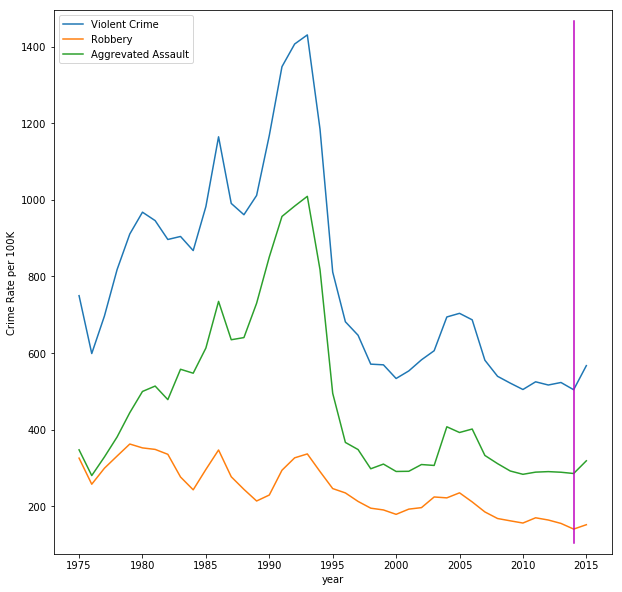

In [75]:
plt.figure(figsize=(10, 10))
labels = {'violent_per_100k': 'Violent Crime',
          'rob_per_100k': 'Robbery',
          'agg_ass_per_100k': 'Aggrevated Assault'
         }
for column in crime_columns[2:]:
    ax = sns.lineplot(x='year', y=column, data=crime_col, label=labels[column], ci=None)
plt.axvline(2014, 0.02, 0.98, c='m', label='Legalization')
plt.ylabel('Crime Rate per 100K')
plt.show()

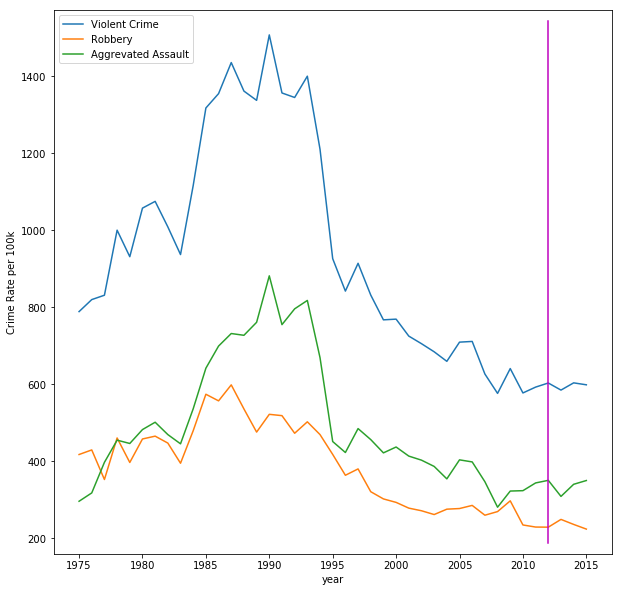

In [76]:
plt.figure(figsize=(10, 10))
for column in crime_columns[2:]:
    ax = sns.lineplot(x='year', y=column, data=crime_wash, label=labels[column])
plt.axvline(2012, 0.02, 0.98, c='m', label='Legalization')
plt.ylabel('Crime Rate per 100k')
plt.show()

In [29]:
pre_od.columns

Index(['Location', 'Year', 'Prescription Opioid Overdose Deaths',
       'Prescription Opioid Overdose Deaths (missing reason)', 'Footnotes'],
      dtype='object')

In [30]:
columns = ['Year', 'Prescription Opioid Overdose Deaths']

pre_od_col = pre_od[columns][pre_od['Location'] == 'Colorado']
pre_od_wash = pre_od[columns][pre_od['Location'] == 'Washington']

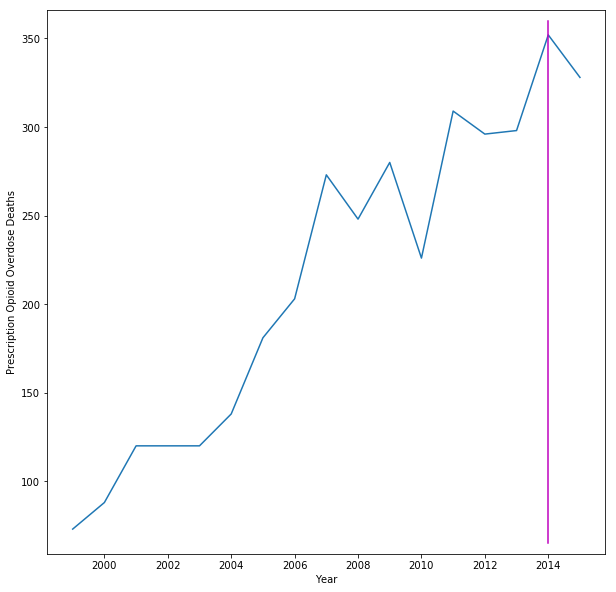

In [77]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='Year', y='Prescription Opioid Overdose Deaths', data=pre_od_col)
plt.axvline(2014, 0.02, 0.98, c='m', label='Legalization')
plt.show()

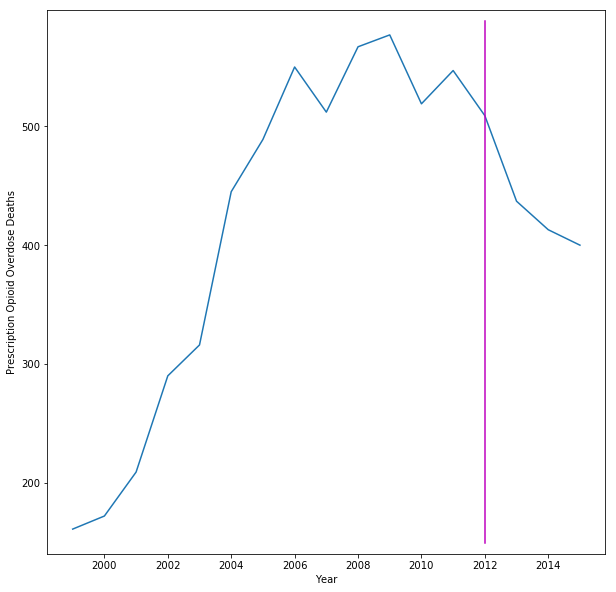

In [78]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='Year', y='Prescription Opioid Overdose Deaths', data=pre_od_wash)
plt.axvline(2012, 0.02, 0.98, c='m', label='Legalization')
plt.show()